In [8]:
import pandas as pd
import numpy as np
from numpy.random import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
%matplotlib inline

file_path = "WLD_RTFP_country_2023-10-02.csv"
df = pd.read_csv(file_path)
df.dropna(subset=['Inflation'], inplace=True)
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.head(5)

,Open,High,Low,Close,Inflation,country,ISO3,date
12,0.74,0.75,0.73,0.75,41.18,Afghanistan,AFG,2008-01-01
13,0.78,0.79,0.77,0.77,44.45,Afghanistan,AFG,2008-02-01
14,0.79,0.82,0.78,0.82,53.62,Afghanistan,AFG,2008-03-01
15,0.85,0.92,0.84,0.92,66.52,Afghanistan,AFG,2008-04-01
16,0.96,1.02,0.94,1.02,77.51,Afghanistan,AFG,2008-05-01


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4434 entries, 12 to 4797
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       4434 non-null   float64       
 1   High       4434 non-null   float64       
 2   Low        4434 non-null   float64       
 3   Close      4434 non-null   float64       
 4   Inflation  4434 non-null   float64       
 5   country    4434 non-null   object        
 6   ISO3       4434 non-null   object        
 7   date       4434 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 311.8+ KB


In [11]:
df.describe()

,Open,High,Low,Close,Inflation
count,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000
mean,1.551795,1.598412,1.508866,1.552312,14.692346
std,4.800994,5.039376,4.580805,4.781196,35.910342
min,0.010000,0.010000,0.010000,0.010000,-31.470000
25%,0.780000,0.790000,0.760000,0.780000,-0.487500
50%,0.970000,0.990000,0.960000,0.970000,5.360000
75%,1.120000,1.140000,1.100000,1.120000,16.372500
max,102.460000,106.480000,94.420000,94.420000,363.100000


Код используется для подсчета количества отсутствующих значений (NaN) в каждом столбце DataFrame. Результат будет представлен в виде Series, где индексы - это названия столбцов, а значения - количество отсутствующих значений в каждом столбце.

In [21]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Inflation    0
country      0
ISO3         0
date         0
dtype: int64

In [12]:
df.isnull().any()

Open         False
High         False
Low          False
Close        False
Inflation    False
country      False
ISO3         False
date         False
dtype: bool

In [13]:
df.head(10)

,Open,High,Low,Close,Inflation,country,ISO3,date
12,0.74,0.75,0.73,0.75,41.18,Afghanistan,AFG,2008-01-01
13,0.78,0.79,0.77,0.77,44.45,Afghanistan,AFG,2008-02-01
14,0.79,0.82,0.78,0.82,53.62,Afghanistan,AFG,2008-03-01
15,0.85,0.92,0.84,0.92,66.52,Afghanistan,AFG,2008-04-01
16,0.96,1.02,0.94,1.02,77.51,Afghanistan,AFG,2008-05-01
17,1.06,1.11,1.04,1.11,89.19,Afghanistan,AFG,2008-06-01
18,1.16,1.18,1.14,1.16,96.05,Afghanistan,AFG,2008-07-01
19,1.20,1.22,1.17,1.17,96.79,Afghanistan,AFG,2008-08-01
20,1.18,1.20,1.16,1.17,89.86,Afghanistan,AFG,2008-09-01
21,1.17,1.19,1.13,1.13,78.44,Afghanistan,AFG,2008-10-01


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4434 entries, 12 to 4797
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       4434 non-null   float64       
 1   High       4434 non-null   float64       
 2   Low        4434 non-null   float64       
 3   Close      4434 non-null   float64       
 4   Inflation  4434 non-null   float64       
 5   country    4434 non-null   object        
 6   ISO3       4434 non-null   object        
 7   date       4434 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 311.8+ KB


*Вопрос 1:*

**"Какие страны лидируют по инфляции в мире?"**

*Этот код строит гистограмму инфляции для первых 10 стран из набора данных.*

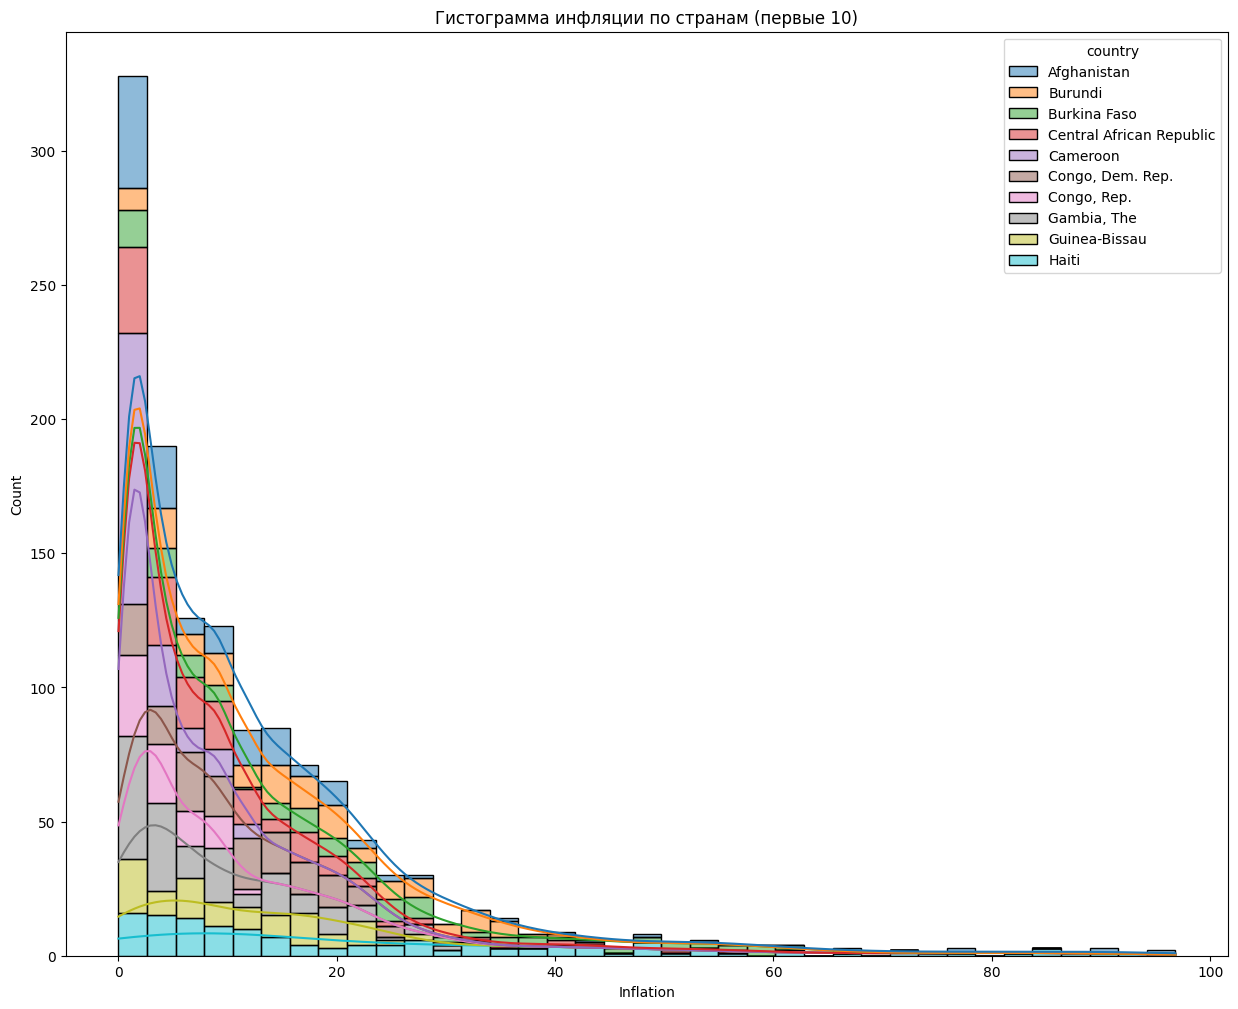

In [38]:
df.dropna(subset=['Inflation'], inplace=True)
df['date'] = pd.to_datetime(df['date'])

df = df[df['Inflation'] >= 0]

selected_countries = df['country'].unique()[:10]

df_selected = df[df['country'].isin(selected_countries)]

plt.figure(figsize=(15, 12))
sns.histplot(data=df_selected, x="Inflation", kde=True, hue='country', palette='tab10', multiple='stack')
plt.title('Гистограмма инфляции по странам (первые 10)')
plt.show()

Вопрос 2:
**"Какие страны имеют наибольшую и наименьшую инфляцию на графике?"**

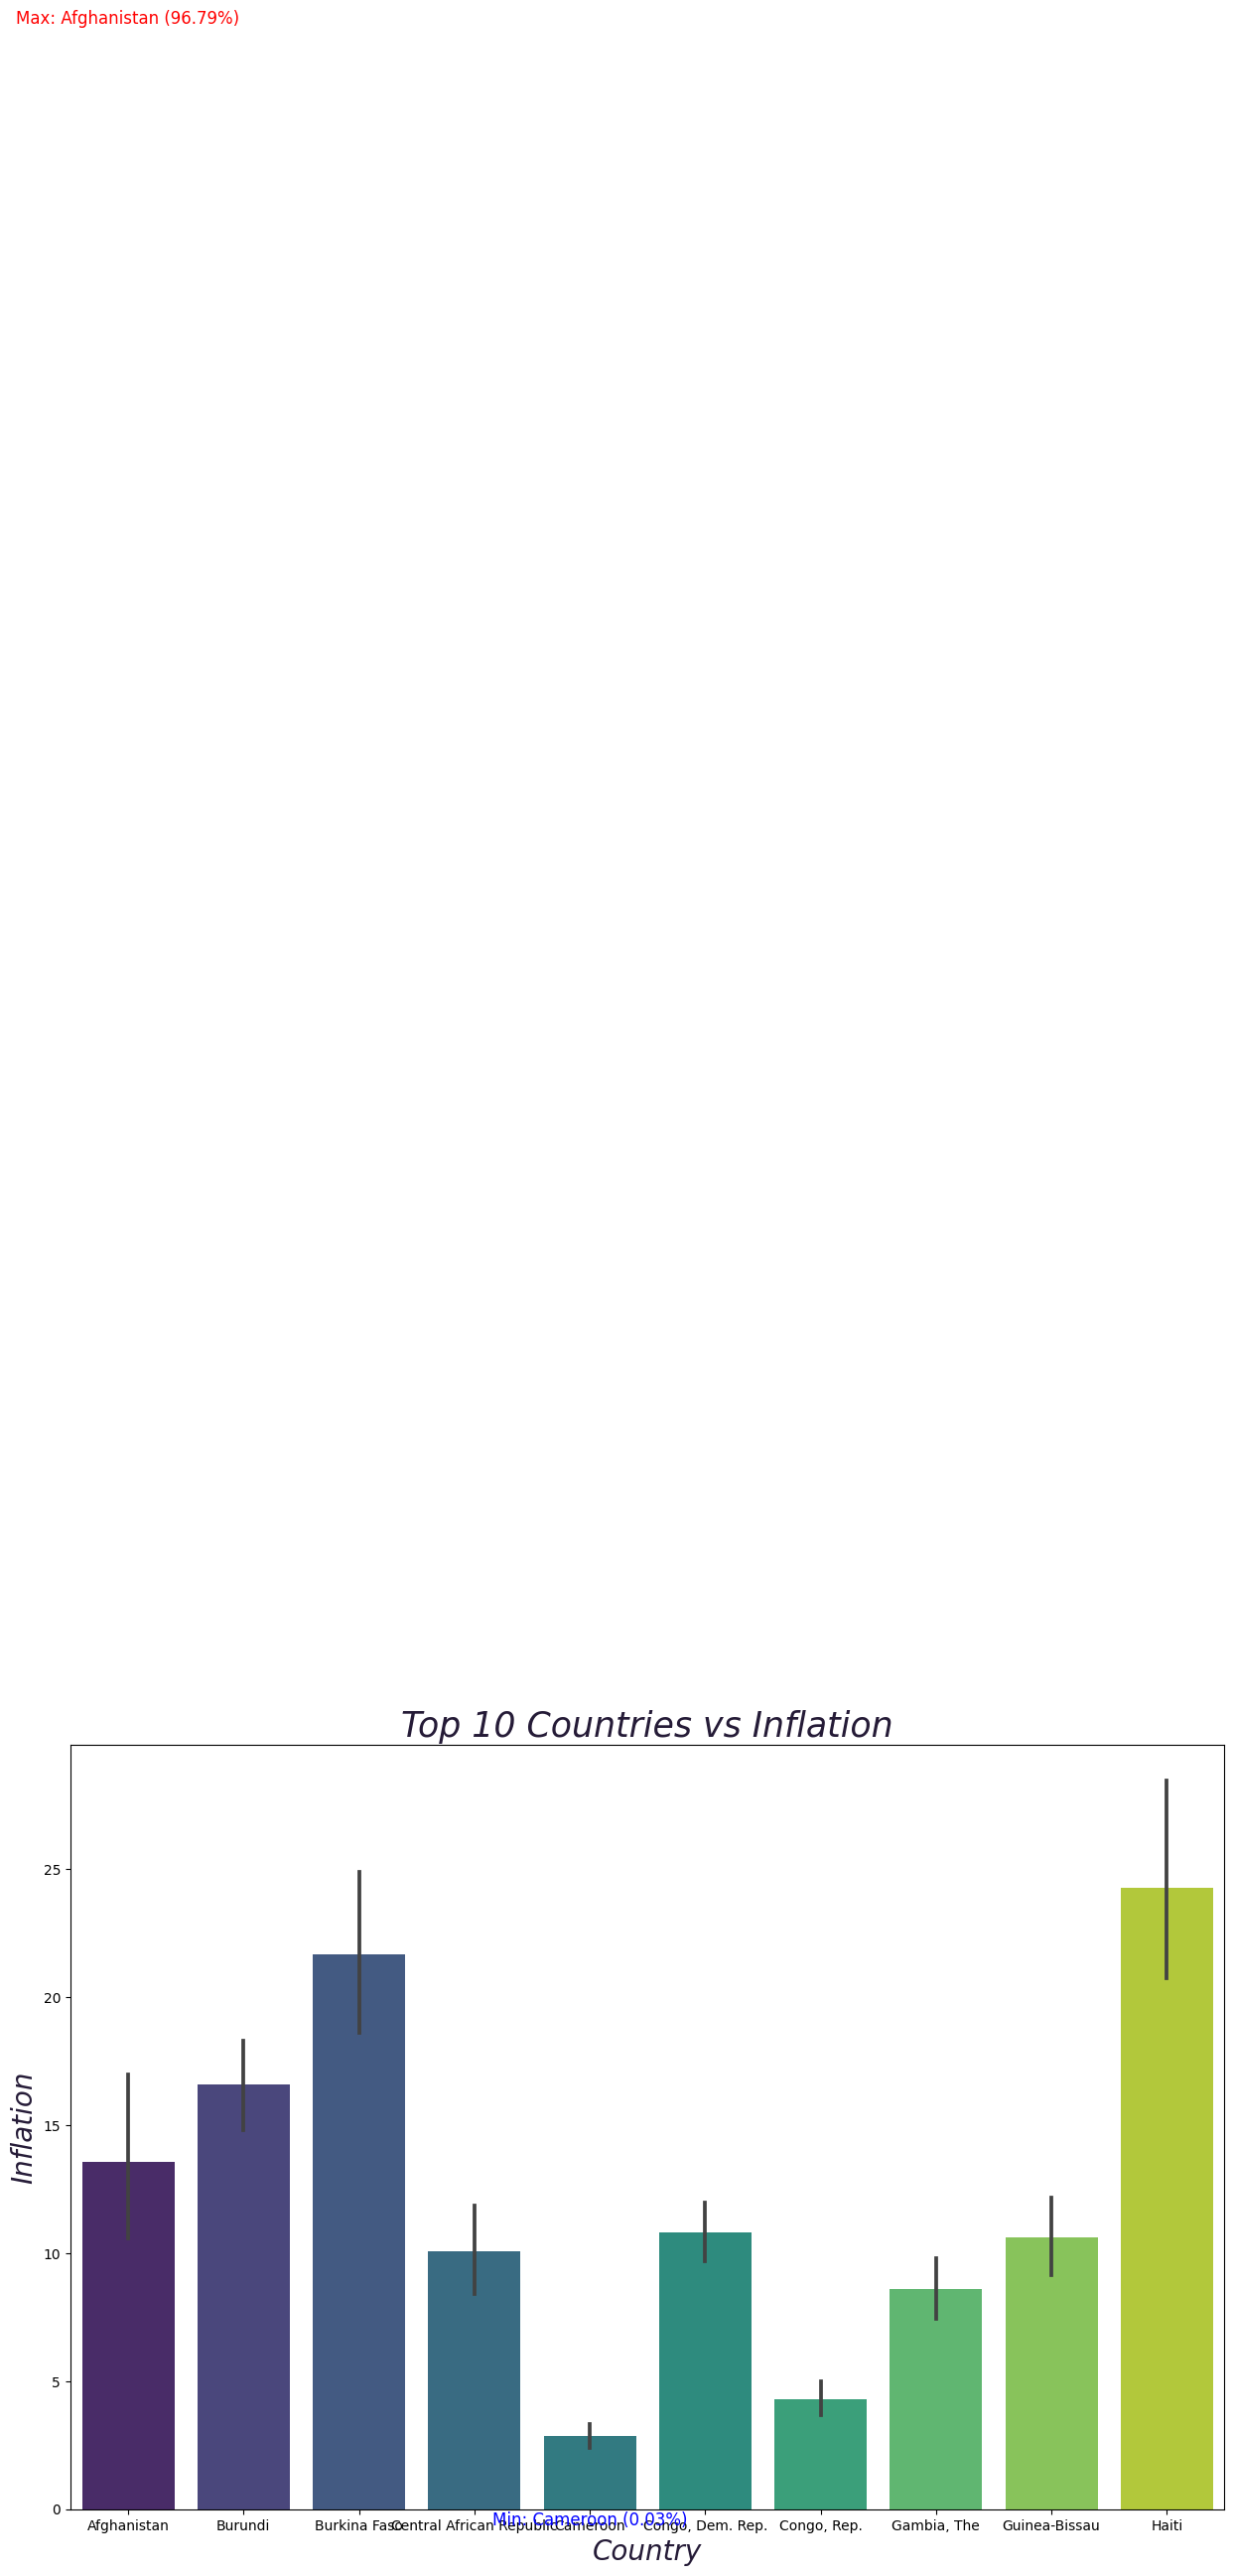

In [25]:
df.dropna(subset=['Inflation'], inplace=True)

df['date'] = pd.to_datetime(df['date'])

df = df[df['Inflation'] >= 0]

selected_countries = df['country'].unique()[:10]

df_selected = df[df['country'].isin(selected_countries)]

plt.figure(figsize=(15, 10))
sns.barplot(data=df_selected, x='country', y='Inflation', palette='viridis')

max_inflation_country = df_selected.loc[df_selected['Inflation'].idxmax()]['country']
min_inflation_country = df_selected.loc[df_selected['Inflation'].idxmin()]['country']

max_inflation = df_selected['Inflation'].max()
min_inflation = df_selected['Inflation'].min()

plt.text(selected_countries.tolist().index(max_inflation_country), max_inflation + 0.1,
         f'Max: {max_inflation_country} ({max_inflation:.2f}%)',
         ha='center', va='bottom', color='red', fontsize=12)

plt.text(selected_countries.tolist().index(min_inflation_country), min_inflation - 0.1,
         f'Min: {min_inflation_country} ({min_inflation:.2f}%)',
         ha='center', va='top', color='blue', fontsize=12)

plt.xlabel(fontsize=20, color='#251B37', xlabel='Country', fontstyle='italic')
plt.ylabel(fontsize=20, color='#251B37', ylabel='Inflation', fontstyle='italic')
plt.title(label='Top 10 Countries vs Inflation', fontsize=25, color='#251B37', fontstyle='italic')
plt.show()

Этот код строит столбчатую диаграмму (barplot), отображая инфляцию для каждой страны в наборе данных.

Вопрос 3:
**Какие действия выполняются в этом коде для визуализации данных инфляции?**

*Этот код создает scatterplot, который визуализирует взаимосвязь между датой и уровнем инфляции. Scatterplot может помочь выявить какие-то закономерности или тренды в изменении инфляции с течением времени.*

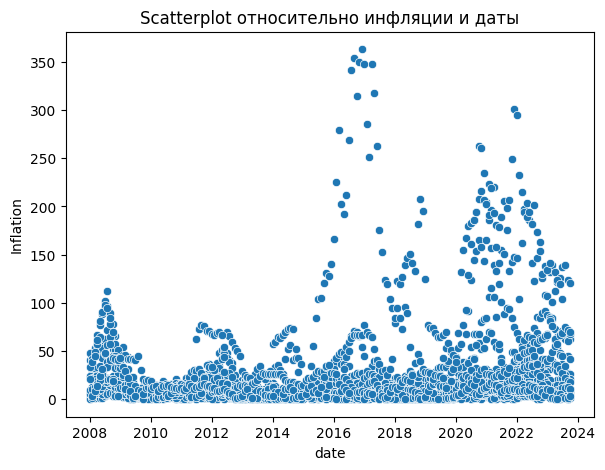

In [22]:
df.dropna(subset=['Inflation'], inplace=True)

df['date'] = pd.to_datetime(df['date'])


df = df[df['Inflation'] >= 0]


plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='date', y='Inflation')
plt.title("Scatterplot относительно инфляции и даты")


plt.show()

Проверка дубликатов

In [56]:
df.duplicated().sum()

0

Вопрос 4:

**"Какие страны из первых пяти в моем наборе данных имеют наибольшую инфляцию, и как это отображается на гистограмме?"**

<Figure size 2500x1000 with 0 Axes>

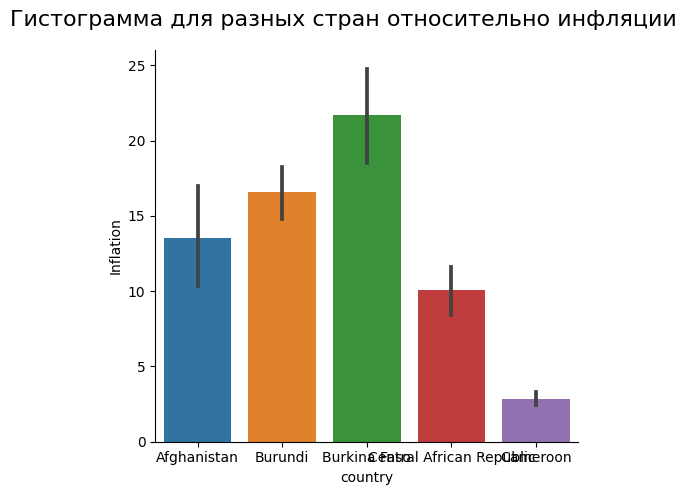

In [23]:
df.dropna(subset=['Inflation'], inplace=True)

df['date'] = pd.to_datetime(df['date'])

df = df[df['Inflation'] >= 0]

selected_countries = df['country'].unique()[:5]

df_selected = df[df['country'].isin(selected_countries)]
plt.figure(figsize=(25, 10))
rp = sns.catplot(y='Inflation', x='country', data=df_selected, kind='bar', sharey=False)
rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Гистограмма для разных стран относительно инфляции', fontsize=16)
plt.show()

Вопрос 5:
**Каково распределение и статистика инфляции в моем наборе данных?**




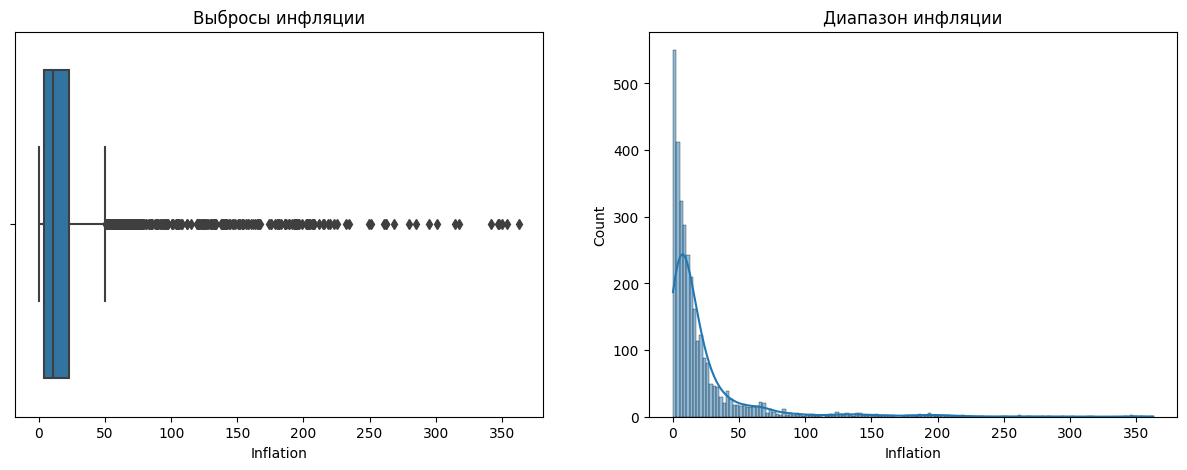

In [24]:
df.dropna(subset=['Inflation'], inplace=True)

df['date'] = pd.to_datetime(df['date'])

df = df[df['Inflation'] >= 0]

plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
sns.boxplot(x='Inflation', data=df)
plt.title("Выбросы инфляции")

plt.subplot(1, 2, 2)
sns.histplot(x='Inflation', data=df, kde=True)
plt.title("Диапазон инфляции")

plt.show()

Этот код позволяет визуально оценить распределение инфляции в наборе данных, а также выявить возможные выбросы с использованием ящика с усами. Гистограмма дополнительно иллюстрирует форму распределения инфляции.